# Exploring Video Game Sales

This dataset contains a list of video games with sales greater than 100,000 copies.

In this project I will deal only with exploratory analysis, where the objective is to understand how the data is distributed and generate insight for future decision-making, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from 1980 to 2016.

### Data information : 
- Rank - Ranking of overall sales, integer
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.), object
- Year - Year of the game's release, float
- Genre - Genre of the game ,object
- Publisher - Publisher of the game, object
- NA_Sales - Sales in North America (in millions), float
- EU_Sales - Sales in Europe (in millions), float
- JP_Sales - Sales in Japan (in millions), float
- Other_Sales - Sales in the rest of the world (in millions), float
- Global_Sales - Total worldwide sales, float

## Source:
- Hosted on [Kaggle](https://www.kaggle.com/gregorut/videogamesales), web [scraped](https://github.com/GregorUT/vgchartzScrape) from [VGChartz.com](http://www.vgchartz.com/gamedb/)


## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

See many other pandas options [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options)

## Read the data

In [2]:
data = pd.read_csv("../data/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Task 1. Which genre have the most games been made for?


Text(0.5, 1.0, 'Top Game Genre')

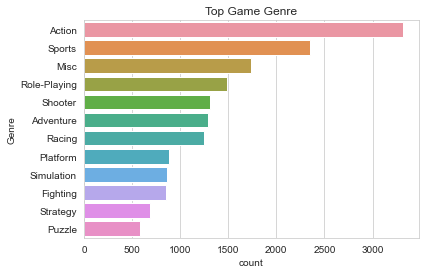

In [4]:
ax = sns.countplot(y='Genre',
              data=data, 
              order=data.Genre.value_counts().index)
ax.set_title('Top Game Genre')

Resources:
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://github.com/mwaskom/seaborn/issues/1029#issuecomment-342365439

## Insight:
Action is the most popular genre followed by Sports

## Task 2. Which year had the most game releases?

Text(0.5, 1.0, 'Game releases by year')

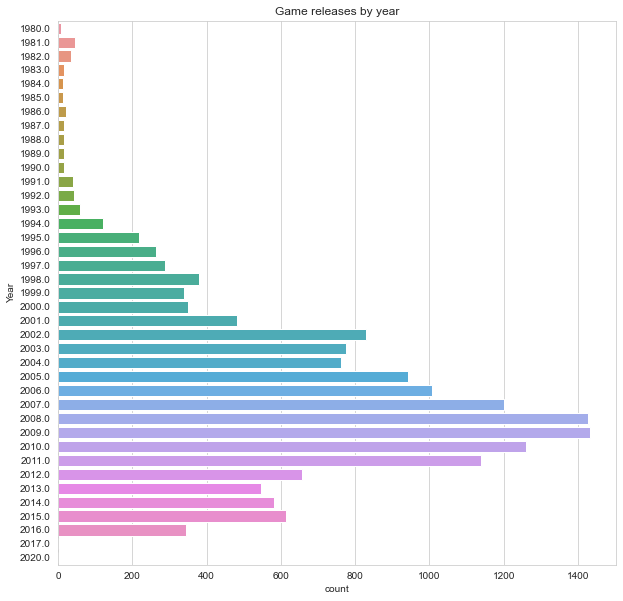

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(y='Year', data=data).set_title('Game releases by year')

## Insight:
- Most games were released between 2008 and 2011
- Some areas to explore would be to look whether this trend of releasing fewer games is due to the fact there are more in-game-purchases or due to continous development trends?

## Task 3. What are the top game genres produced for the five years with maximum game production?

In [6]:
# lets get the five years with max game production
max_gp = data.Year.value_counts().nlargest(5)
max_gp

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: Year, dtype: int64

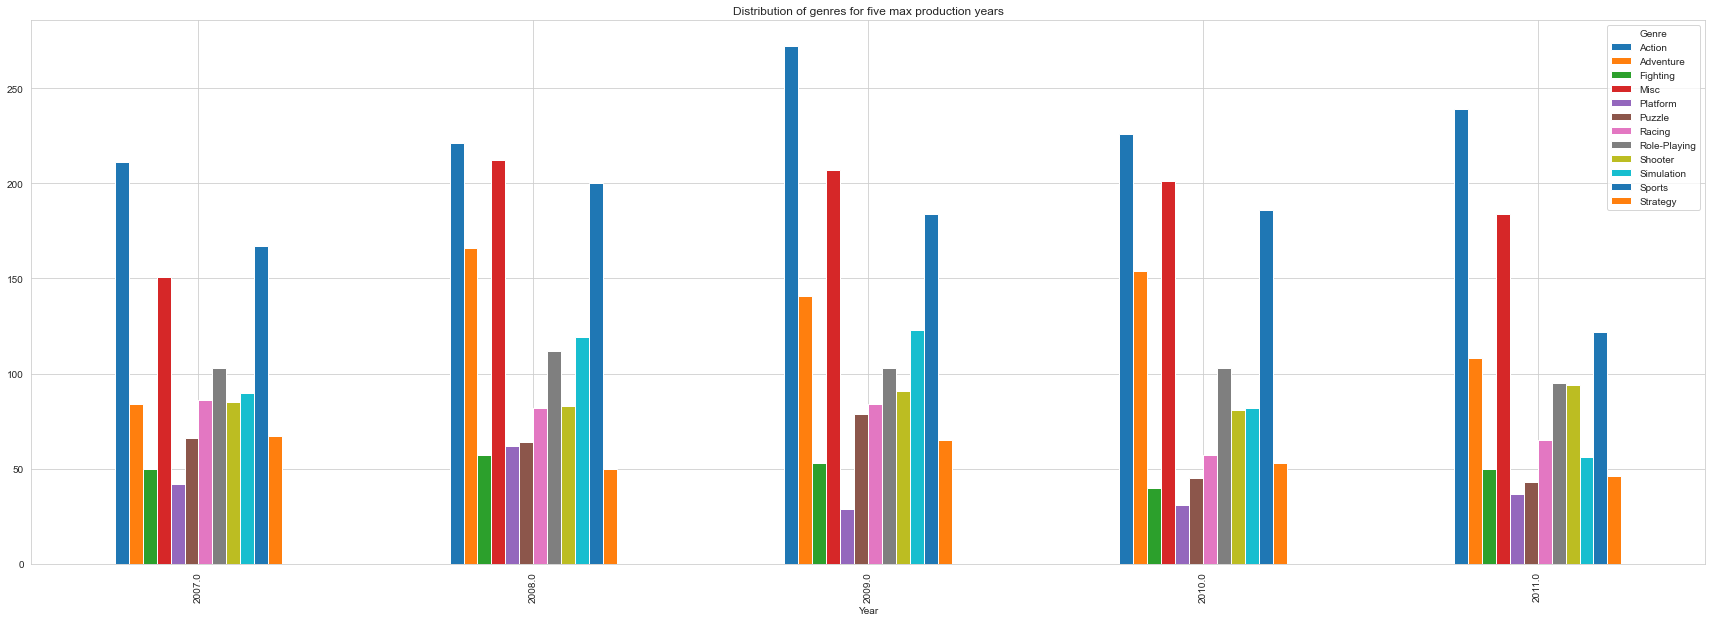

In [7]:
## lets try using pandas and matplotlib
(data
 .loc[data.Year.isin(max_gp.index),['Year','Genre']]
 .groupby(['Year','Genre'])
 .Genre
 .count()
 .unstack()
 .plot.bar(figsize=(30,10), title='Distribution of genres for five max production years')
)

Text(0.5, 1.0, 'Distribution of genres for five max production years')

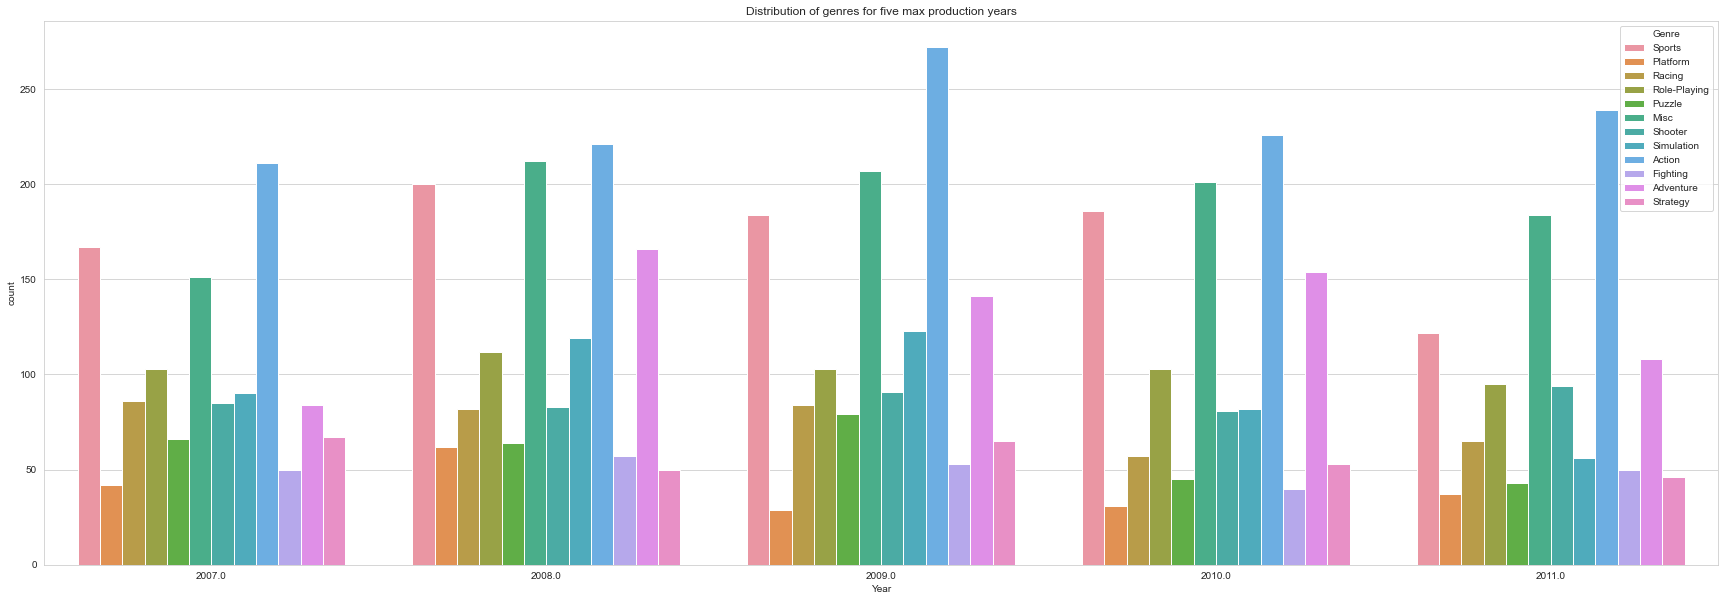

In [8]:
# with seaborn this type of plot is very easy to make
plt.figure(figsize=(30,10))
sns.countplot(x='Year',
             data=data,
             order=data.Year.value_counts().nlargest(5).index.sort_values(),
             hue='Genre').set_title('Distribution of genres for five max production years')

## Insight:
Nothing interesting in particular, except that Action is the dominant genre

## Task 4. Which genre has sold the most games per year?



In [9]:
## lets find the global sales for each genre per year
sales_by_year = (data
 .groupby(by=['Year','Genre'])
 .Global_Sales
 .sum()
 .reset_index())

## Lets find the max global sales per year
sales_by_year['Max_Global_Sales'] = (sales_by_year
                                     .groupby(['Year'])
                                     .Global_Sales
                                     .transform(max)
                                    )

## Lets filter out the most selling genre per year
max_sales_by_year = (sales_by_year
 .loc[sales_by_year.Global_Sales == sales_by_year.Max_Global_Sales]
 .drop(columns=['Max_Global_Sales'])
 .reset_index(drop=True)
)

max_sales_by_year.head()

,Year,Genre,Global_Sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.84
2,1982.0,Puzzle,10.03
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10


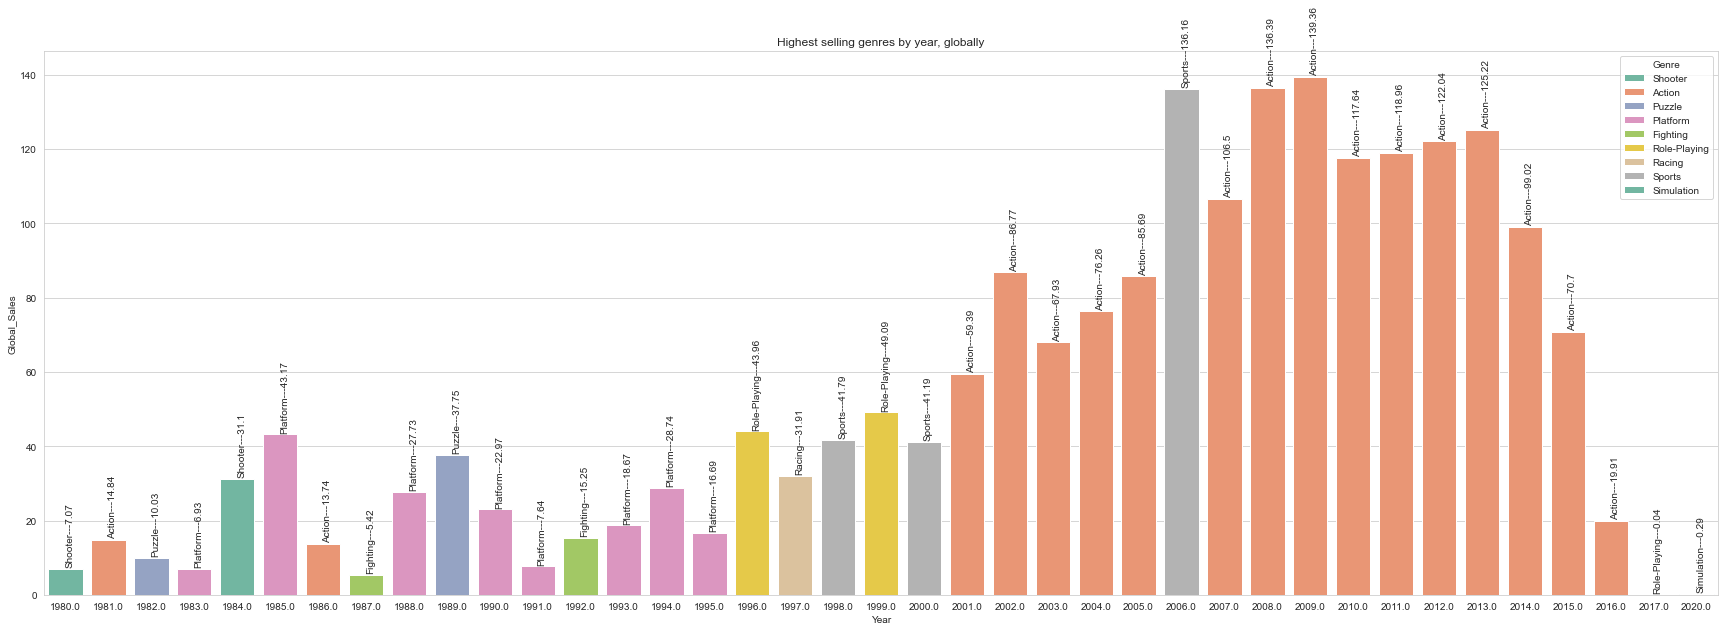

In [10]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x='Year',
                 y='Global_Sales',
                 hue='Genre',
                 palette="Set2",
                 dodge=False,
                 data=max_sales_by_year)
ax.set_title('Highest selling genres by year, globally')
## adding annotaions on bars
for index in range(0,max_sales_by_year.shape[0]):
    ax.text(index, max_sales_by_year.Global_Sales[index]+1,
           str(max_sales_by_year.Genre[index] + '---' + 
              str(round(max_sales_by_year.Global_Sales[index],2))),
           rotation=90)



Resources:
- https://stackoverflow.com/a/59683826/8210613
- https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/
- https://thepythonguru.com/python-string-formatting/

## Insight:
Action has dominated the market in the last 15 years or so.

## Task 5. Which platform has the highest sales globally?

[Text(0.5, 1.0, 'Global Sales by Platform')]

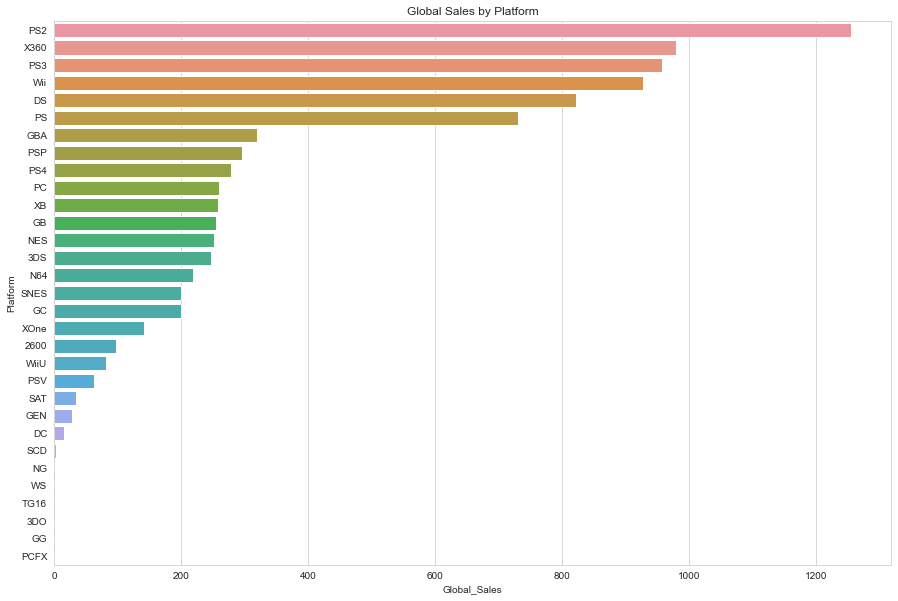

In [11]:

df_plat_sales = (data
 .groupby('Platform')
 .Global_Sales.sum()
 .sort_values(ascending=False)
 .reset_index()
)
plt.figure(figsize=(15,10))
sns.barplot(x='Global_Sales',
           y='Platform',
           data=df_plat_sales).set(title='Global Sales by Platform')

## Task 6. Which individual game has the highest sales globally?

In [12]:
## it seems like the data set is already sorted by Global_Sales
data.loc[:19,['Name','Global_Sales']]

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


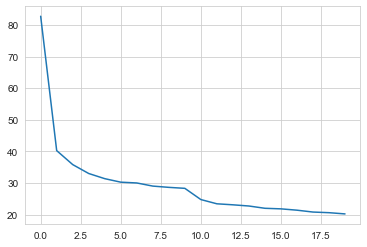

In [13]:
data.Global_Sales.head(20).plot()

In [14]:
# however the games seem to repeat, maybe due to be re-released on different plaform or regions?
data.Name.value_counts()

Need for Speed: Most Wanted         12
Madden NFL 07                        9
LEGO Marvel Super Heroes             9
FIFA 14                              9
Ratatouille                          9
                                    ..
Haze                                 1
Digging for Dinosaurs                1
Age of Empires III: Gold Edition     1
Classic Action: Devilish             1
Spore Hero                           1
Name: Name, Length: 11493, dtype: int64

[Text(0.5, 1.0, 'Top 20 selling games globally')]

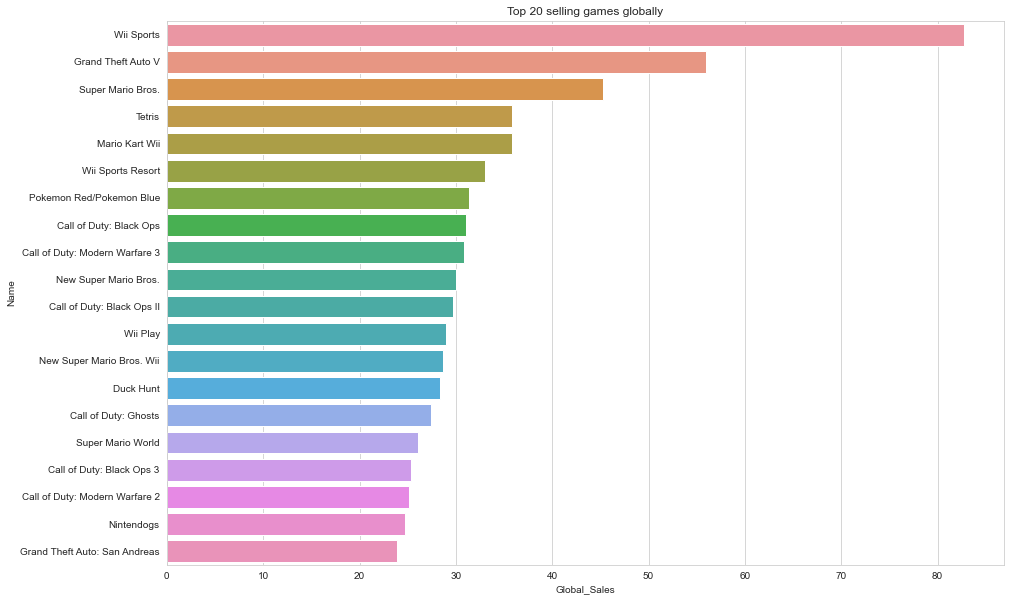

In [15]:
# so lets group them together and calculate the total global_sales before plotting
df_name_sales = (data
 .groupby('Name')
 .Global_Sales.sum()
 .sort_values(ascending=False)
 .reset_index()
 .head(20)
)
plt.figure(figsize=(15,10))
sns.barplot(x='Global_Sales',
           y='Name',
           data=df_name_sales).set(title='Top 20 selling games globally')

## Insight:
Wii Sports is by far the most top selling game in the world, followed by GTA V and Super Mario Bros.

## Task 7. Find the total revenue by region.

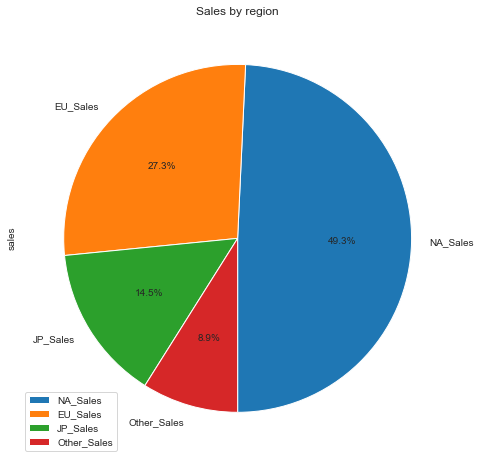

In [16]:
(data
 .loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
 .sum()
 .reset_index()
 .rename(columns={'index':'region',0:'sales'})
 .set_index('region')
 .plot.pie(y='sales', startangle=270,figsize=(10,8),
          autopct='%.1f%%', title="Sales by region")
)

## Task 8. What other questions you would want to get answered?

8.1. Distribution of genres for top five producing years

Text(0.5, 1.0, 'Distribution of genres for top five producing years')

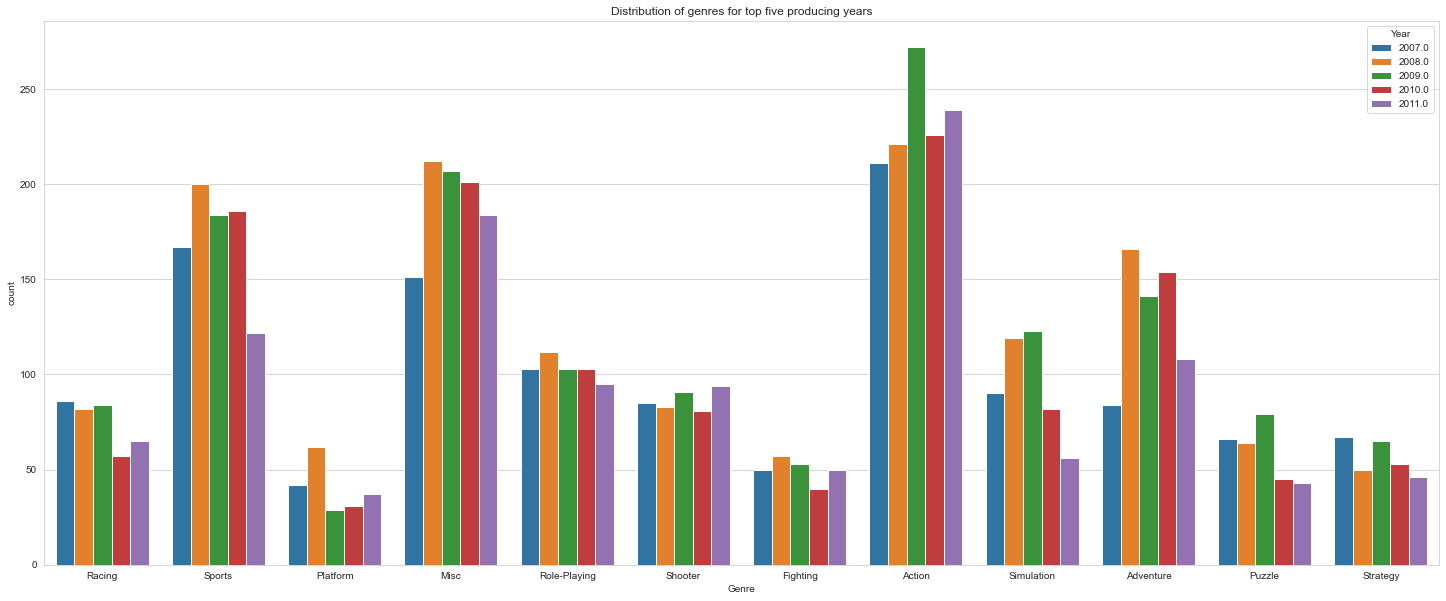

In [17]:
plt.figure(figsize=(25,10))

sns.countplot(x='Genre',
             data=data.loc[data.Year.isin(data.Year.value_counts().head(5).index),:],
             hue='Year',
             ).set_title('Distribution of genres for top five producing years')

8.2 Animate pie-chart in Task 7

In [18]:
# Convert data into year-wise
df1 = (data
 .loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
 .dropna()
 .astype({'Year':int})
 .groupby('Year')
 .sum()
)
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70


In [80]:
from matplotlib import animation, rc
from IPython.display import HTML, Image

def update(i):
    if(df1.index.min() == df1.index[i]):
        # when we have no data 1980-1980
        plot,_ = ax.pie(x=np.zeros(0))
    else:
        ax.clear()
        ax.axis('equal')
        plot = (df1
         .head(i)
         .sum()
         .plot.pie(y=df1.columns,
                   startangle=270,
                   autopct='%.1f%%', 
                   title="Sales by region {}-{}".format(df1.index.min(),df1.index[i]),
                   label='')
        )

    return(plot)
    

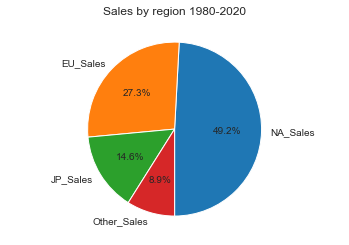

In [82]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
fig, ax = plt.subplots()
animator = animation.FuncAnimation(fig, update, frames=df1.shape[0], repeat=False)
animator

## Resources: 
- You will need to install FFmpeg and setup PATH variables before you can use it
- https://medium.com/@suryadayn/error-requested-moviewriter-ffmpeg-not-available-easy-fix-9d1890a487d3
- https://www.gyan.dev/ffmpeg/builds/ffmpeg-release-full.zip

## What useful insights would you like to take to the stakeholders planning to come up with a new game?

## Take away activity : Understand the data more, complete the analysis keeping in mind the above business stakeholder question or any other and share your notebook on slack